## Importing Libraries

In [104]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_predict

import warnings
warnings.filterwarnings('ignore')

## Getting Data

In [2]:
abalone=pd.read_csv("Abalone.csv")

# Exploratory Data Analysis

In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
Sex               4176 non-null object
Length            4176 non-null int64
Diameter          4176 non-null int64
Height            4176 non-null int64
Whole_weight      4176 non-null float64
Shucked_weight    4176 non-null float64
Viscera_weight    4176 non-null float64
Shell_weight      4176 non-null float64
Rings             4176 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


In [4]:
abalone.shape

(4176, 9)

The training set has 4176 entries 8 features and one target variable .4 of the features are floats, 4 are integers and 1 is objects. 

In [5]:

#SexM, F, and I (infant)---------------------->:SEX
#LengthLongest shell measurement-------------------->:LENGTH
#Diameterperpendicular to length-------------------->:Diameter
#Heightwith meat in shell---------------------------->:Height
#Whole weightwhole abalone---------------------------->:whole weight
#Shucked weightweight of meat------------------>shucked weight
#Viscera weightgut weight (after bleeding)-------->Viscera weight
#Shell weightafter being dried------------------->shell weight
#Rings+1.5 gives the age in years--------------->rings
abalone.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,104.801724,81.578305,27.905412,165.763506,71.879957,36.122534,47.770426,9.932471
std,24.020509,19.849906,8.365278,98.084710,44.395943,21.924091,27.842510,3.223601
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.675000,26.000000,8.000000
50%,109.000000,85.000000,28.000000,159.950000,67.200000,34.200000,46.800000,9.000000
75%,123.000000,96.000000,33.000000,230.650000,100.400000,50.600000,65.800000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


from here you may see that there is no missing data .you may notice that one ring is equal to Rings + 1.5 years and here Minimum age of Abalone is 1+1.5=2.5 years
and Maximum age of abalone is 29+1.5=30.5 years 

and i had observe one thing Shell_weight contains alot of outliers and whole_weight also contains lot of outliers

In [6]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,70,53,18,45.1,19.9,9.7,14.0,7
1,F,106,84,27,135.4,51.3,28.3,42.0,9
2,M,88,73,25,103.2,43.1,22.8,31.0,10
3,I,66,51,16,41.0,17.9,7.9,11.0,7
4,I,85,60,19,70.3,28.2,15.5,24.0,8


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale.

There is no null data is present in this dataset

In [7]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

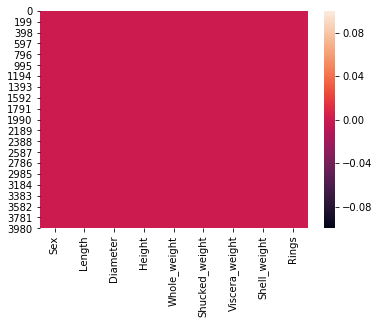

In [8]:
#Checing weather null data and Missing data is present or not
sns.heatmap(abalone.isnull())

from here there is no null data and upto now data is clean

# Data Preprocessing

In [9]:
gender={'M':0,'F':1,'I':2}
abalone['Sex']=abalone['Sex'].map(gender)

In [10]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
Sex               4176 non-null int64
Length            4176 non-null int64
Diameter          4176 non-null int64
Height            4176 non-null int64
Whole_weight      4176 non-null float64
Shucked_weight    4176 non-null float64
Viscera_weight    4176 non-null float64
Shell_weight      4176 non-null float64
Rings             4176 non-null int64
dtypes: float64(4), int64(5)
memory usage: 293.8 KB


Above you might see that Sex is an object and that has been changed into integer column

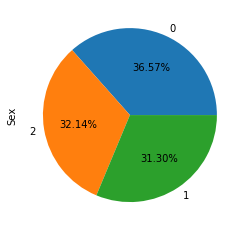

In [11]:
abalone['Sex'].value_counts().plot.pie(autopct="%2.2f%%")

#### Observations:

It's clear that 36.57% Male and 31.30% Female and 32.14% are un-identified 

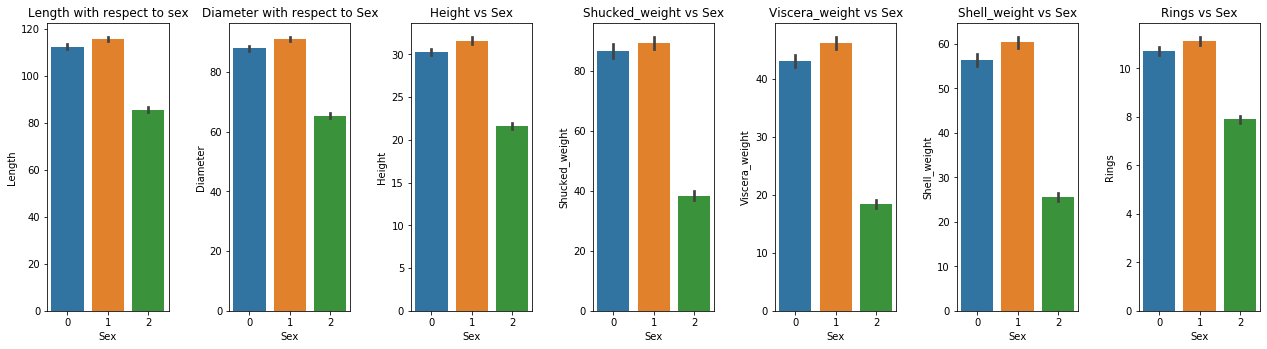

In [12]:
plt.figure(figsize=(25,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(181)
plt.title('Length with respect to sex')
sns.barplot(x="Sex", y="Length", data=abalone)
plt.subplot(182)
plt.title('Diameter with respect to Sex')
sns.barplot(x="Sex", y="Diameter", data=abalone)
plt.subplot(183)
plt.title('Height vs Sex')
sns.barplot(x="Sex", y="Height", data=abalone)
plt.subplot(184)
plt.title('Shucked_weight vs Sex')
sns.barplot(x="Sex", y="Shucked_weight", data=abalone)
plt.subplot(185)
plt.title('Viscera_weight vs Sex')
sns.barplot(x="Sex", y="Viscera_weight", data=abalone)
plt.subplot(186)
plt.title('Shell_weight vs Sex')
sns.barplot(x="Sex", y="Shell_weight", data=abalone)
plt.subplot(187)
plt.title('Rings vs Sex')
sns.barplot(x="Sex", y="Rings", data=abalone)

### Observations:

From here highest length for Females compared to other two and lowest length is Un-identified category.

for females diameter is more compared to other two and un-identified category has low diameter compared to other two

Almost both for females and males Height is same and Age for both Males and Females age is same 

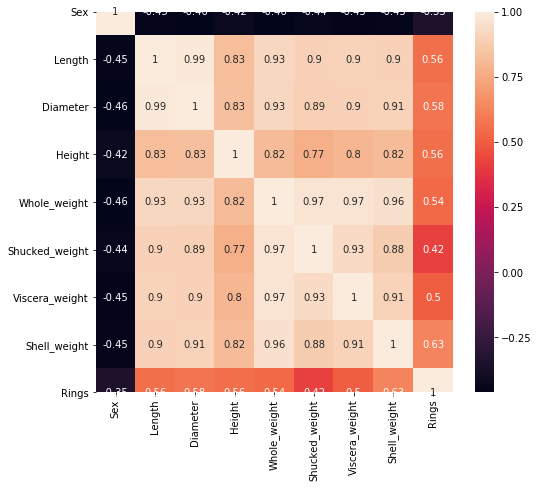

In [13]:
#to check Cor-relation
corr_hmap=abalone.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

it's better to drop Sex column

From now upto here it's clear and everything is perfect

In [14]:
#Removing Children column
abalone.drop('Sex',axis=1,inplace=True)

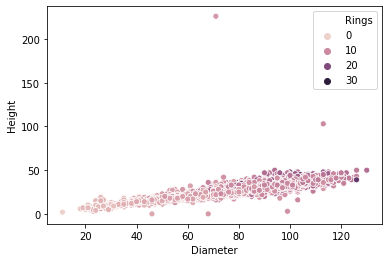

In [15]:
sns.scatterplot(x='Diameter',y='Height',hue='Rings',data =abalone)

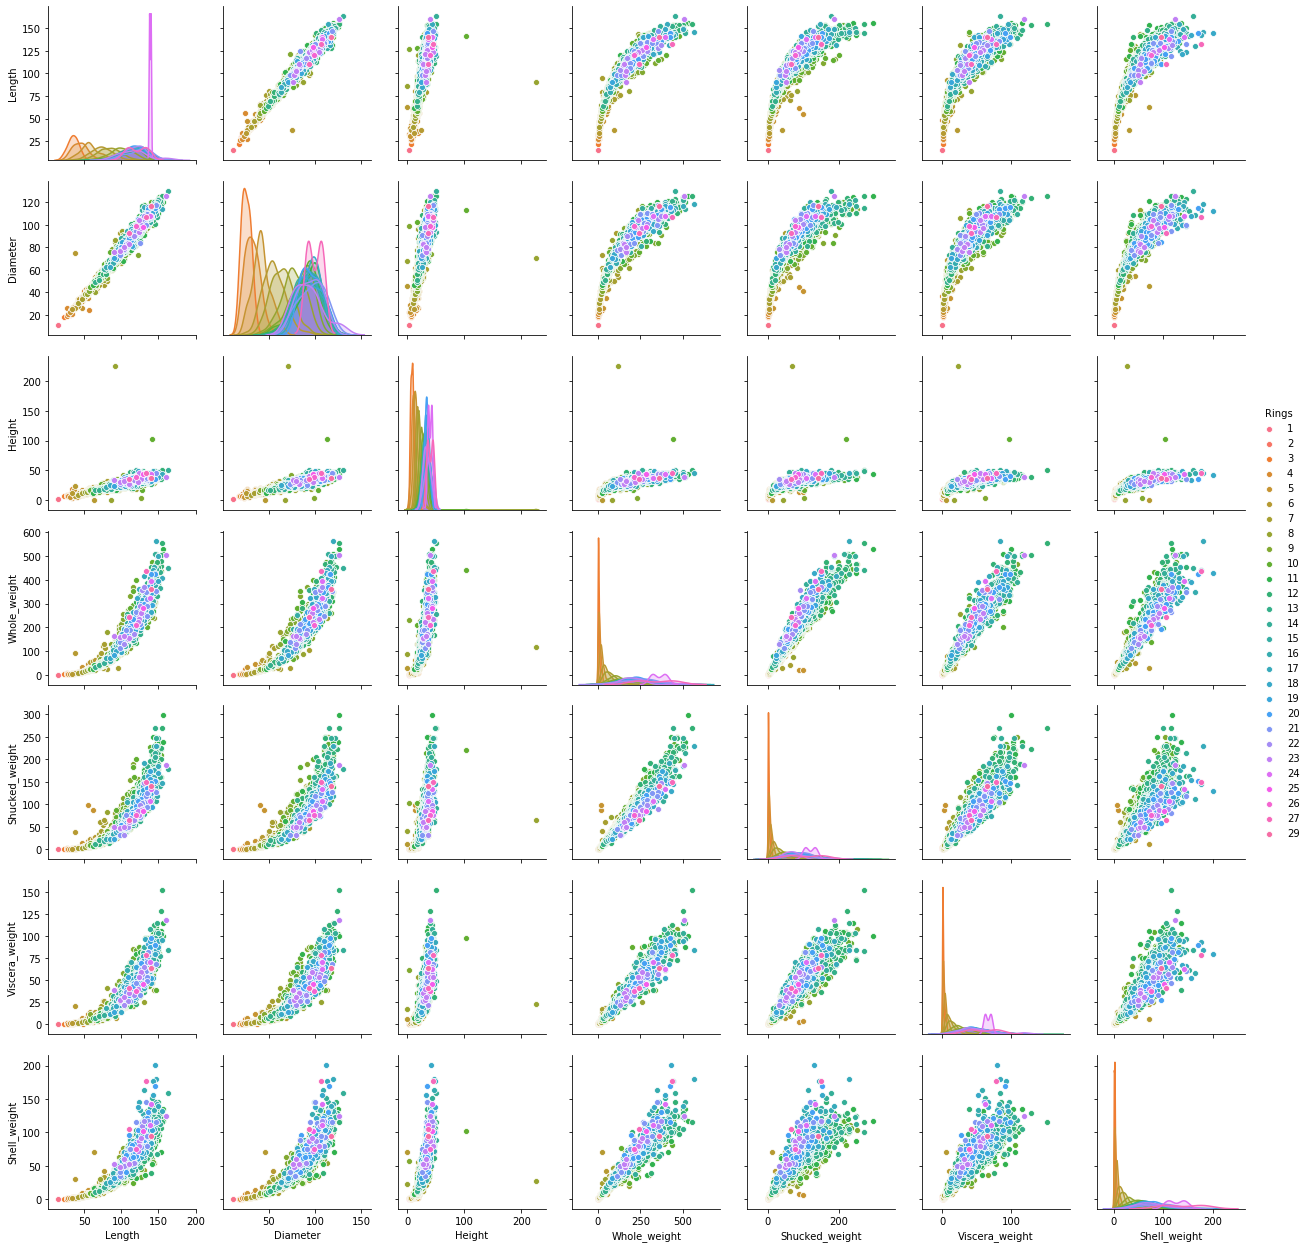

In [16]:
sns.pairplot(abalone ,hue ='Rings', vars =['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'])

In [17]:
abalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,70,53,18,45.1,19.9,9.7,14.0,7
1,106,84,27,135.4,51.3,28.3,42.0,9
2,88,73,25,103.2,43.1,22.8,31.0,10
3,66,51,16,41.0,17.9,7.9,11.0,7
4,85,60,19,70.3,28.2,15.5,24.0,8
...,...,...,...,...,...,...,...,...
4171,113,90,33,177.4,74.0,47.8,49.8,11
4172,118,88,27,193.2,87.8,42.9,52.1,10
4173,120,95,41,235.2,105.1,57.5,61.6,9
4174,125,97,30,218.9,106.2,52.2,59.2,10


In [18]:
le = LabelEncoder()
list1=['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'
      ]
for i in list1 :
    abalone[i] = le.fit_transform(abalone[i])

In [19]:
abalone.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,45,36,17,285,178,94,113,7
1,81,67,26,962,480,280,374,9
2,63,56,24,718,400,225,273,10
3,41,34,15,253,159,76,87,7
4,60,43,18,463,254,152,207,8


## Check Distribution Of Skewness

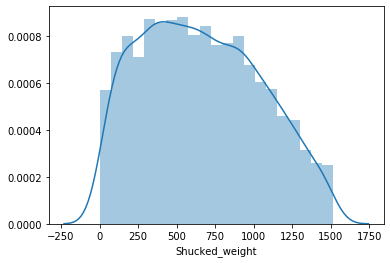

In [20]:
sns.distplot(abalone['Shucked_weight'])

In [21]:
collist=abalone.columns
ncol=8
nrows=6

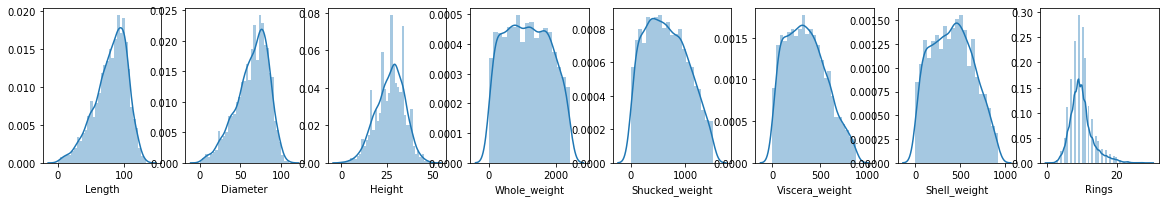

In [22]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(abalone[collist[i]])

## Identify and Removing Outliers

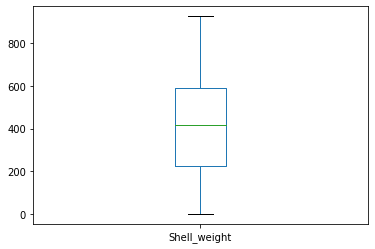

In [23]:
abalone['Shell_weight'].plot.box()

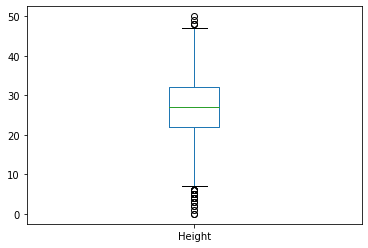

In [24]:
abalone['Height'].plot.box()

Length               AxesSubplot(0.125,0.536818;0.133621x0.343182)
Diameter          AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Height             AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Whole_weight      AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Shucked_weight    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Viscera_weight          AxesSubplot(0.125,0.125;0.133621x0.343182)
Shell_weight         AxesSubplot(0.285345,0.125;0.133621x0.343182)
Rings                 AxesSubplot(0.44569,0.125;0.133621x0.343182)
dtype: object

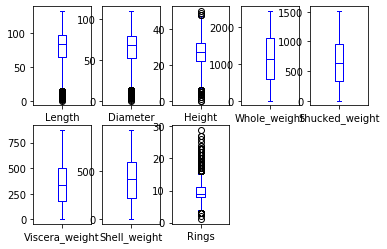

In [25]:
abalone.plot(kind='box',subplots=True,layout=(2,5),color='blue')

From aboove you may see that there alot of outliers present and need to remove those outliers

In [26]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(abalone))
z


array([[1.45031993, 1.44040686, 1.27813002, ..., 1.2421841 , 1.30965015,
        0.90979684],
       [0.04982316, 0.12201928, 0.11036362, ..., 0.35383516, 0.17155813,
        0.28929846],
       [0.70024838, 0.43238999, 0.36986726, ..., 0.61651899, 0.61196922,
        0.02095074],
       ...,
       [0.63321214, 0.67642856, 1.7061619 , ..., 1.03600109, 0.5958909 ,
        0.28929846],
       [0.84156534, 0.77723024, 0.27889185, ..., 0.7828694 , 0.50868078,
        0.02095074],
       [1.54996625, 1.48284205, 1.44665825, ..., 1.80494829, 1.74270393,
        0.64144912]])

In [27]:
threshold=3
np.where((z>3))

(array([   5,   71,   82,  165,  166,  180,  231,  235,  235,  235,  236,
         236,  237,  237,  238,  269,  274,  277,  293,  309,  312,  313,
         350,  354,  361,  374,  415,  416,  427,  430,  432,  468,  477,
         479,  500,  525,  525,  529,  571,  627,  672,  673,  674,  677,
         693,  693,  695,  695,  718,  718,  719,  719,  743,  753,  755,
         810, 1173, 1256, 1428, 1428, 1985, 1986, 1986, 2050, 2107, 2113,
        2113, 2168, 2175, 2179, 2198, 2200, 2208, 2274, 2304, 2333, 2334,
        2343, 2357, 2380, 2435, 2458, 2470, 3139, 3148, 3150, 3192, 3279,
        3358, 3836, 3898, 3898, 3901, 3901, 3923, 3929, 3943, 3995],
       dtype=int64),
 array([7, 7, 7, 7, 7, 7, 7, 0, 1, 2, 0, 1, 0, 1, 0, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 1, 7, 7, 7, 7, 7, 7, 7,
        1, 2, 0, 1, 0, 1, 0, 1, 7, 7, 7, 7, 2, 2, 0, 1, 0, 0, 1, 2, 7, 0,
        1, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 1, 0, 1, 0,

In [28]:
z[121][5]

0.05771884660385218

In [29]:
z[443][6]

0.8997626002283077

In [30]:
abalone_new=abalone[(z<3).all(axis=1)]

In [31]:
abalone_new.shape

(4092, 8)

In [32]:
abalone.shape

(4176, 8)

In [33]:
abalone_new.skew()

Length           -0.571627
Diameter         -0.552090
Height           -0.178932
Whole_weight      0.092359
Shucked_weight    0.248083
Viscera_weight    0.377080
Shell_weight      0.144678
Rings             0.712818
dtype: float64

from here you may see 106 outliers had been removed

## Building Machine Learning Model

In [34]:
abalone

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,45,36,17,285,178,94,113,7
1,81,67,26,962,480,280,374,9
2,63,56,24,718,400,225,273,10
3,41,34,15,253,159,76,87,7
4,60,43,18,463,254,152,207,8
...,...,...,...,...,...,...,...,...
4171,88,73,32,1289,698,475,442,11
4172,93,71,26,1411,832,426,463,10
4173,95,78,40,1727,994,571,550,9
4174,100,80,29,1610,1005,518,530,10


In [35]:
x=abalone.iloc[:,:-1]
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,45,36,17,285,178,94,113
1,81,67,26,962,480,280,374
2,63,56,24,718,400,225,273
3,41,34,15,253,159,76,87
4,60,43,18,463,254,152,207


In [36]:
y=abalone.iloc[:,-1:]
y.head()

,Rings
0,7
1,9
2,10
3,7
4,8


In [37]:
x.shape

(4176, 7)

In [38]:
y.shape

(4176, 1)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=58)

In [89]:
x_train.shape

(3132, 7)

In [90]:
x_train.ndim

2

In [91]:
y_train.shape

(3132, 1)

In [92]:
x_test.shape

(1044, 7)

In [93]:
y_test.shape

(1044, 1)

In [94]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [95]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [96]:
lr=LinearRegression(normalize=True)
rfr=RandomForestRegressor(n_estimators=100)
rg=RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
dtr=DecisionTreeRegressor()

In [97]:
seed=7
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('RandomForestRegressor',rfr)) 
models.append(('RidgeCV',rg))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
RSquare=[]
cvs=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    kfold=model_selection.KFold(random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=15).mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    rsquare=metrics.r2_score(y_test,pred)
    print('R-square',rsquare)
    RSquare.append(rsquare)

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


score 0.5472694487370788


Cross-val-score= 0.37698765491058145


Performance Measures:
MAE 1.591833584463885
MSE 4.732454198925116
RMSE 2.175420464858487
R-square 0.5426632391633279
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


score 0.933042531186475


Cross-val-score= 0.3785146026418082


Performance Measures:
MAE 1.5695785440613028
MSE 4.624077586206897
RMSE 2.150366849215942

In [111]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSquare':RSquare,'cvs':cvs},columns=['models','score','MAE','MSE','RMSE','RSquare','cvs'])
result

,models,score,MAE,MSE,RMSE,RSquare,cvs
0,LinearRegression,54.726945,1.591834,4.732454,2.175420,0.542663,37.698765
1,RandomForestRegressor,93.304253,1.569579,4.624078,2.150367,0.553137,37.851460
2,RidgeCV,53.742370,1.602401,4.766011,2.183120,0.539420,37.674542


# Predicting Data

In [112]:
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('predicted age:',pred)
print('actual age',y_test)

predicted age: [ 8.3 11.4  7.3 ...  9.4 10.4 14.4]
actual age       Rings
1276      8
1749     12
138       9
974       8
3966      6
...     ...
576      10
2463     11
3656      7
3671     10
434      11

[1044 rows x 1 columns]


# Saving Model

In [113]:
abalone=pd.DataFrame(pred)
abalone.to_csv('rfr_abalone.csv')

In [114]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfr,'abalone.obj')
#load the model from a file
rfr_from_joblib=joblib.load('abalone.obj')
#use the loaded model to make prediction
rfr_from_joblib.predict(x_test)

array([ 8.3, 11.4,  7.3, ...,  9.4, 10.4, 14.4])

Done upto now.......